In [27]:
import pickle
import numpy as np
import librosa
import sklearn as sk
import scipy
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
def get_features(mfcc,mel_spect,y):
  featstack = np.hstack((np.mean(mfcc, axis=1), np.std(mfcc, axis=1), scipy.stats.skew(mfcc, axis = 1), np.max(mfcc, axis = 1), np.median(mfcc, axis = 1), np.min(mfcc, axis = 1)))
  feat2 = librosa.feature.zero_crossing_rate(y)[0]
  feat2stack = np.hstack((np.mean(feat2), np.std(feat2), scipy.stats.skew(feat2, bias=False), np.max(feat2), np.median(feat2), np.min(feat2)))
  feat3 = librosa.feature.spectral_rolloff(y=y)[0] #a frequência abaixo da qual se encontra um certo percentual da energia espectral cumulativa (por padrão, 85%)
  feat3stack = np.hstack((np.mean(feat3), np.std(feat3), scipy.stats.skew(feat3,bias=False), np.max(feat3), np.median(feat3), np.min(feat3)))
  feat4 = librosa.feature.spectral_centroid(y=y)[0]
  feat4stack = np.hstack((np.mean(feat4), np.std(feat4), scipy.stats.skew(feat4, bias=False), np.max(feat4), np.median(feat4), np.min(feat4)))
  feat5 = librosa.feature.spectral_contrast(y=y)[0]
  feat5stack = np.hstack((np.mean(feat5), np.std(feat5), scipy.stats.skew(feat5, bias=False), np.max(feat5), np.median(feat5), np.min(feat5)))
  feat6 = librosa.feature.spectral_bandwidth(y=y)[0]
  feat6stack = np.hstack((np.min(feat6), np.std(feat6), scipy.stats.skew(feat6, bias=False), np.max(feat6), np.median(feat6), np.min(feat6)))
  mfcc_data = pd.Series(np.hstack((featstack, feat2stack, feat3stack, feat4stack, feat5stack, feat6stack)))
  return mfcc_data

In [29]:
def matriz_confusao(labels, c2i, Y_pred, Y_test):
  rotulos = []
  for label in labels:
    rotulos.append(c2i[label])
  cm = sk.metrics.confusion_matrix(Y_test, Y_pred,labels=rotulos)
  cm_disp = sk.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  cm_disp.plot()


In [30]:
file_path = '/content/audios_teste/**/*.wav'
audiosList = glob.glob(file_path, recursive = True) #carrega todos os arquivos .wav que estão na pasta audios
if not audiosList:
    print("Nenhum arquivo de áudio encontrado. Verifique o caminho.")

#print(audiosList)

all_mfccs = [] #lista de mfccs
names = [] #lista de nomes dos áudios
all_mfcc_datas = []

for audio in audiosList: #percorre todos os arquivos de audio
    try:
      #obtem o nome do arquivo
      namesparts = audio.split('/')
      name = namesparts[len(namesparts)-2]
      print(name)
      names.append(name)


      y, sr = librosa.load(audio, sr=None) #carrega o audio

      spec = np.abs(librosa.stft(y, hop_length=512))
      spec = librosa.amplitude_to_db(spec, ref=np.max)

      #calcula e plota o mel spectrogram
      mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

      ##antigo mfccs = librosa.feature.mfcc(y=y,sr=sr, n_mfcc=13)
      mfccs = librosa.feature.mfcc(S=mel_spect,sr=sr, n_mfcc=13) #n_mfcc é a quantidade de coeficientesr
      all_mfccs.append(mfccs)

      all_mfcc_datas.append(get_features(mfccs, mel_spect, y))

    except Exception as e:
      print(f'Erro ao processar arquivo')

zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
zero
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left


In [35]:
all_mfcc_datas = np.array(all_mfcc_datas)
print(all_mfcc_datas.shape)

(717, 108)


In [12]:
matrix = all_mfcc_datas
print(matrix)
labels = np.sort(np.unique(names))
c2i = {}
i2c = {}
for i, c in enumerate(labels):
  i2c[i] = c
  c2i[c] = i

[[-5.00225647e+02  6.54152985e+01 -1.23509665e+01 ...  3.30599097e+03
   2.39142534e+03  1.37219223e+03]
 [-6.22022339e+02  8.94673309e+01  7.52608299e+00 ...  3.59880748e+03
   2.17571076e+03  9.41970624e+02]
 [-6.90033752e+02  8.75969696e+01  1.73639374e+01 ...  3.60615923e+03
   1.58117354e+03  0.00000000e+00]
 ...
 [-5.74082764e+02  1.10380402e+02 -1.26758080e+01 ...  2.49214724e+03
   1.97203839e+03  1.62493275e+03]
 [-6.45023499e+02  9.41810150e+01  1.93688917e+00 ...  3.34290584e+03
   2.26875873e+03  1.93538238e+03]
 [-7.49400879e+02  7.59905319e+01 -9.18265533e+00 ...  3.26026002e+03
   2.62736729e+03  1.00031892e+03]]


In [13]:
y = np.array([c2i[x] for x in names])
print(y)

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [14]:
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
      if np.isnan(matrix[i][j]):
        print(i,j)
        matrix[i][j] = 0
#print(X_to_train[0])

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(matrix)
with open('/content/pca.pkl', 'rb') as pickle_file:
  pca = pickle.load(pickle_file)
X_pca = pca.transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [19]:
svc = joblib.load('/content/svm_treinado.pkl')
Y_predicao = svc.predict(X_pca)
accuracy = sk.metrics.accuracy_score(y, Y_predicao)
print(sk.metrics.classification_report(y,Y_predicao))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


              precision    recall  f1-score   support

           0       0.65      0.65      0.65       106
           1       0.72      0.71      0.72       100
           2       0.71      0.75      0.73       100
           3       0.75      0.80      0.77        98
           4       0.84      0.84      0.84       108
           5       0.90      0.89      0.90       102
           6       0.89      0.82      0.85       103

    accuracy                           0.78       717
   macro avg       0.78      0.78      0.78       717
weighted avg       0.78      0.78      0.78       717



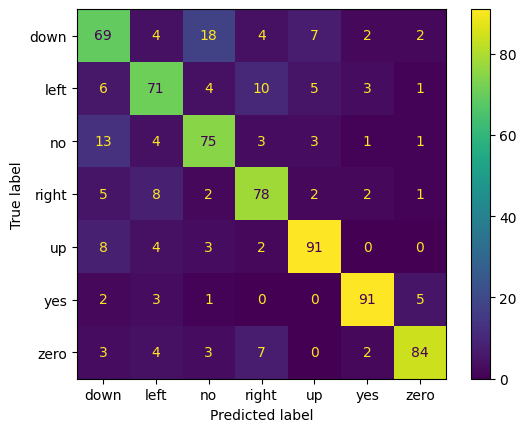

In [25]:
matriz_confusao(labels, c2i, Y_predicao, y)